# Análise exploratória da nuScenes

## Introdução

A base de dados que será explorada nesse notebook é a [nuScenes](https://www.nuscenes.org/nuscenes). Esta base possui 1000 cenas (vídeos de aproximadamente 20 segundos) de um carro que possui diversos sensores acoplados à ele. Importante ressaltar que neste notebook estamos usando a base de dados sem nenhum complemento, como lidarseg ou o panoptic.

As cenas foram coletadas por um veículo percorrendo ruas em Boston e Singapura. O carro utilizado possuia os seguintes sensores (mais especificações sobre os sensores podem ser consultados no [site da base de dados](https://www.nuscenes.org/nuscenes#data-collection)):

- 1x LiDAR (Velodyne HDL32E);
- 6x Cameras (Basler acA1600-60gc);
- 5x RADAR (Continental ARS 408-21);
- 1x IMU & GPS ([Advanced Navigation Spatial](https://www.advancednavigation.com/inertial-navigation-systems/mems-gnss-ins/spatial/)).

Uma ilustração do carro utilizado e seus sensores pode ser consultada logo abaixo:

![ilustração do carro e seus sensores](../images/car-ilustration.png)

A base de dados também possui anotações de *bounding boxes 3D* em 2Hz (2 frames anotados por segundo). Foram usadas 23 classes diferentes de objetos, sendo estas classes, por exemplo, pedestres, carros, bicicletas, etc. Todas as possíveis classes e outras informações relacionadas à elas podem ser consultadas no [site da base de dados](https://www.nuscenes.org/nuscenes#data-annotation).

Ao todo, a base de dados possui aproximadamente:

- 1,4 milhões de imagens de câmera;
- 390 mil varreduras de LiDAR;
- 1,4 milhões de varreduras de RADAR;
- 1,4 milhões de *bounding boxes 3D* anotados;
- 40 mil *keyframes* (frames que possuem anotações, com todos os sensores com entradas em momentos semelhantes).

**Observação**

Neste notebook não será trabalhado com a base de dados completa, e sim uma versão reduzida. Como este notebook tem o intuíto de entender melhor o funcionamento da base de dados (não sendo realizada nenhuma especie de treinamento de modelos de aprendizado de máquina), não há problemas em utilizar essa versão reduzida.

Essa base reduzida possui apenas 10 cenas, totalizando 3 GB (a base completa possui centenas de GB). Com isso, fica mais fácil de instalar os componentes necessários para executar este notebook e mais fácil de executar em computadores menos potentes (com menos memória). Mais adiante no notebook existe uma seção contendo um tutorial para instalar essa versão da base de dados.

## Links úteis

**Artigo científico sobre a base de dado**
- [nuScenes: A Multimodal Dataset for Autonomous Driving](https://ieeexplore-ieee-org.ez31.periodicos.capes.gov.br/document/9156412)

**Página web sobre a base de dados**
- https://www.nuscenes.org/nuscenes

**Tutoriais oficiais**
- https://github.com/nutonomy/nuscenes-devkit/tree/master#getting-started-with-nuscenes
- https://www.nuscenes.org/nuscenes?tutorial=nuscenes#tutorials
- https://github.com/nutonomy/nuscenes-devkit/blob/master/python-sdk/tutorials/nuscenes_tutorial.ipynb

**Documentação**
- [FAQ](https://github.com/nutonomy/nuscenes-devkit/blob/master/docs/faqs.md)
- [Instalação da base de dados de forma cru (sem o PIP)](https://github.com/nutonomy/nuscenes-devkit/blob/master/docs/installation.md)
- [Schema completo da base de dados nuScenes](https://github.com/nutonomy/nuscenes-devkit/blob/master/docs/schema_nuscenes.md)

## Instalação

Para conseguir executar as células desse notebook, é preciso ter instalado a biblioteca `nuscenes-devkit`. Esta biblioteca possui várias funcionalidades para manipular a base de dados da nuScene.

OBS: a instalação do `opencv-python` foi forçada para ser feita na versão `4.5.4.58` (mais antiga). Provavelmente, na versão 3.7 do Python (versão recomendada pela biblioteca `nuscenes-devkit`) as versões mais recentes do `opencv` não funcionam (que deve funcionar em versões mais recentes do Python). A versão `4.5.4.57` é a versão mínima exigida pela biblioteca `nuscenes-devkit`.

In [1]:
%pip install opencv-python==4.5.4.58
%pip install nuscenes-devkit

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Além de instalar as bibliotecas, é preciso baixar a base de dados. Neste notebook, está sendo utilizado a versão reduzida (`v1.0-mini`). Está versão da base de dados pode ser baixada no seguinte link: https://www.nuscenes.org/nuscenes#download

Para conseguir baixar, é preciso se registrar no site. Ao finalizar o registro, faça o login e escolha fazer download da versão `1.0-mini` da base de dados `nuScenes`, como mostrado na imagem abaixo:

![print screen indicando onde baixar](../images/download-tutorial.png)

Após o término do download, extraia os arquivos na pasta `data`.

## Importações

A seguir estão os comandos para importar as bibliotecas necessárias para executar o notebook por completo

In [2]:
from nuscenes.nuscenes import NuScenes

## Explorando a base de dados

A base de dados pode ser separada em diversas tabelas, como em um *schema* de um banco de dados. Estas tabelas são:

1.  [`log` - ](#log)
2.  [`scene`: ](#scene)
3.  [`sample`: ](#sample)
4.  [`sample_data`: ](#sample_data)
5.  [`ego_pose`: ](#ego_pose)
6.  [`sensor`: ](#sensor)
7.  [`calibrated_sensor`: ](#calibrated_sensor)
8.  [`instance`: ](#instance)
9.  [`category`: ](#category)
10. [`attribute`: ](#attribute)
11. [`visibility`: ](#visibility)
12. [`sample_annotation`: ](#sample_annotation)
13. [`map`: ](#map)

Cada uma dessas tabelas será explicada em mais detalhes em futuras seções (OBS: no sumário acima é possível clicar em um item para ser direcionado para a seção sobre aquele item).

Abaixo há uma imagem desse *schema*:

<center>
    <img alt="database schema image" src="../images/database-schema.svg">
</center>


Para acessar e visualizar os dados contidos nessa base de dados, a biblioteca `nuscenes-devkit` pode ser utilizada. Com ela é possível percorrer pelos dados das tabelas apresentadas no *schema*. Na célula de código a seguir, um comando para instanciar a biblioteca sobre a base de dados reduzida é introduzido

In [3]:
nusc = NuScenes(version='v1.0-mini', dataroot='../data', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.813 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


### <a id="scene"></a>2- Scene

Uma cena consiste basicamente de um "vídeo" de aproximadamente 20 segundos, com os dados coletados pelos diversos sensores. A cena não possui os dados de todos os sensores diretamente, mas ela aponta para *samples* que possuem essas informações (a partir do `first_sample_token` e `last_sample_token`). A seguir é apresentado uma descrição de todos os atributos de uma cena:

```plain
scene {
   "token":                   <str> -- Identificador único da cena (igual a um ID)
   "name":                    <str> -- Identificador da cena mais "amigável"
   "description":             <str> -- Uma descrição da cena
   "log_token":               <str> -- Chave estrangeira para coletar o log dessa cena
   "nbr_samples":             <int> -- Quantidade de samples nessa cena
   "first_sample_token":      <str> -- Chave estrangeira apontando para a primeira sample
   "last_sample_token":       <str> -- Chave estrangeira apontando para a última sample
}
```

OBS: Os *samples* possuem apontadores para outros *samples*, funcionando de forma parecida com uma lista duplamente encadeada. Então, como temos acesso ao primeiro ou último *sample*, é possível percorrer por todos os nós a partir deles.

Para visualizar todas as cenas disponíveis, o método `list_scenes` pode ser utilizado, mostrando uma rápida descrição da cena em cada linha. Como estamos trabalhando na versão reduzida, apenas 10 cenas devem ser mostradas neste comando, mas no dataset real seriam 1000

In [4]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

Também é possível utilizar a lista `scene` para acessar uma cena específica. Por exemplo, ao executar `scene[0]`, coletamos todos os dados da primeira cena.

In [5]:
my_scene = nusc.scene[0]
my_scene

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

### <a id="sample"></a> 3 - Sample

A cada 0,5 segundos (2Hz) um frame de uma cena é anotado (possui os *bounding boxes*). Quando isso ocorre em um frame, ele é chamado de **keyframe**

Um *sample* é um **keyframe**, possuindo as anotações e as entradas de todos os sensores em um momento semelhante para todos. As propriedades de cada *sample* são as seguintes:

```plain
sample {
   "token":                   <str> -- Identificador único do sample (igual um ID)
   "timestamp":               <int> -- Unix timestamp (é o momento em que o sample foi coletado os dados do sample)
   "scene_token":             <str> -- Chave estrangeira apontando para a cena que o sample faz parte
   "next":                    <str> -- Chave estrangeira apontando para o próximo sample da mesma cena. Será vazio se o sample atual for o último da cena
   "prev":                    <str> -- Chave estrangeira apontando para o sample anterior da mesma cena. Será vazio se o sample atual for o primeiro da cena
   "data"*: {                 <dict> -- Um dicionário com apontadores para os dados de todos os sensores nesse momento.
      'RADAR_FRONT':          <str> -- Chave estrangeira apontando para o sample_data do radar da frente
      'RADAR_FRONT_LEFT':     <str> -- Chave estrangeira apontando para o sample_data do radar da frente na esquerda
      'RADAR_FRONT_RIGHT':    <str> -- Chave estrangeira apontando para o sample_data do radar da frente na direita
      'RADAR_BACK_LEFT':      <str> -- Chave estrangeira apontando para o sample_data do radar de trás na esquerda
      'RADAR_BACK_RIGHT':     <str> -- Chave estrangeira apontando para o sample_data do radar de trás na direita
      'LIDAR_TOP':            <str> -- Chave estrangeira apontando para o sample_data do LiDAR
      'CAM_FRONT':            <str> -- Chave estrangeira apontando para o sample_data da câmera da frente
      'CAM_FRONT_RIGHT':      <str> -- Chave estrangeira apontando para o sample_data da câmera da frente na direita
      'CAM_BACK_RIGHT':       <str> -- Chave estrangeira apontando para o sample_data da câmera de trás na direita
      'CAM_BACK':             <str> -- Chave estrangeira apontando para o sample_data da câmera de trás
      'CAM_BACK_LEFT':        <str> -- Chave estrangeira apontando para o sample_data da câmera de trás na esquerda
      'CAM_FRONT_LEFT':       <str> -- Chave estrangeira apontando para o sample_data da câmera da frente na esquerda
   },
   "anns"*:                   <list> -- lista de chaves estrangeiras de anotações
}
```

\* Propriedades marcadas com asterisco (`data` e `anns`) não existem no *schema*. Estas propriedades são criadas pelo devkit, biblioteca que está sendo utilizada para interagir com os dados.



Na célula de código a seguir, o método `render_sample` é usado para mostrar imagens dos dados que podem ser acessados a partir de um sample. Esse método aceita um **token** (ID) de sample. Neste caso, id enviado é do primeiro sample da primeira cena da base de dados.

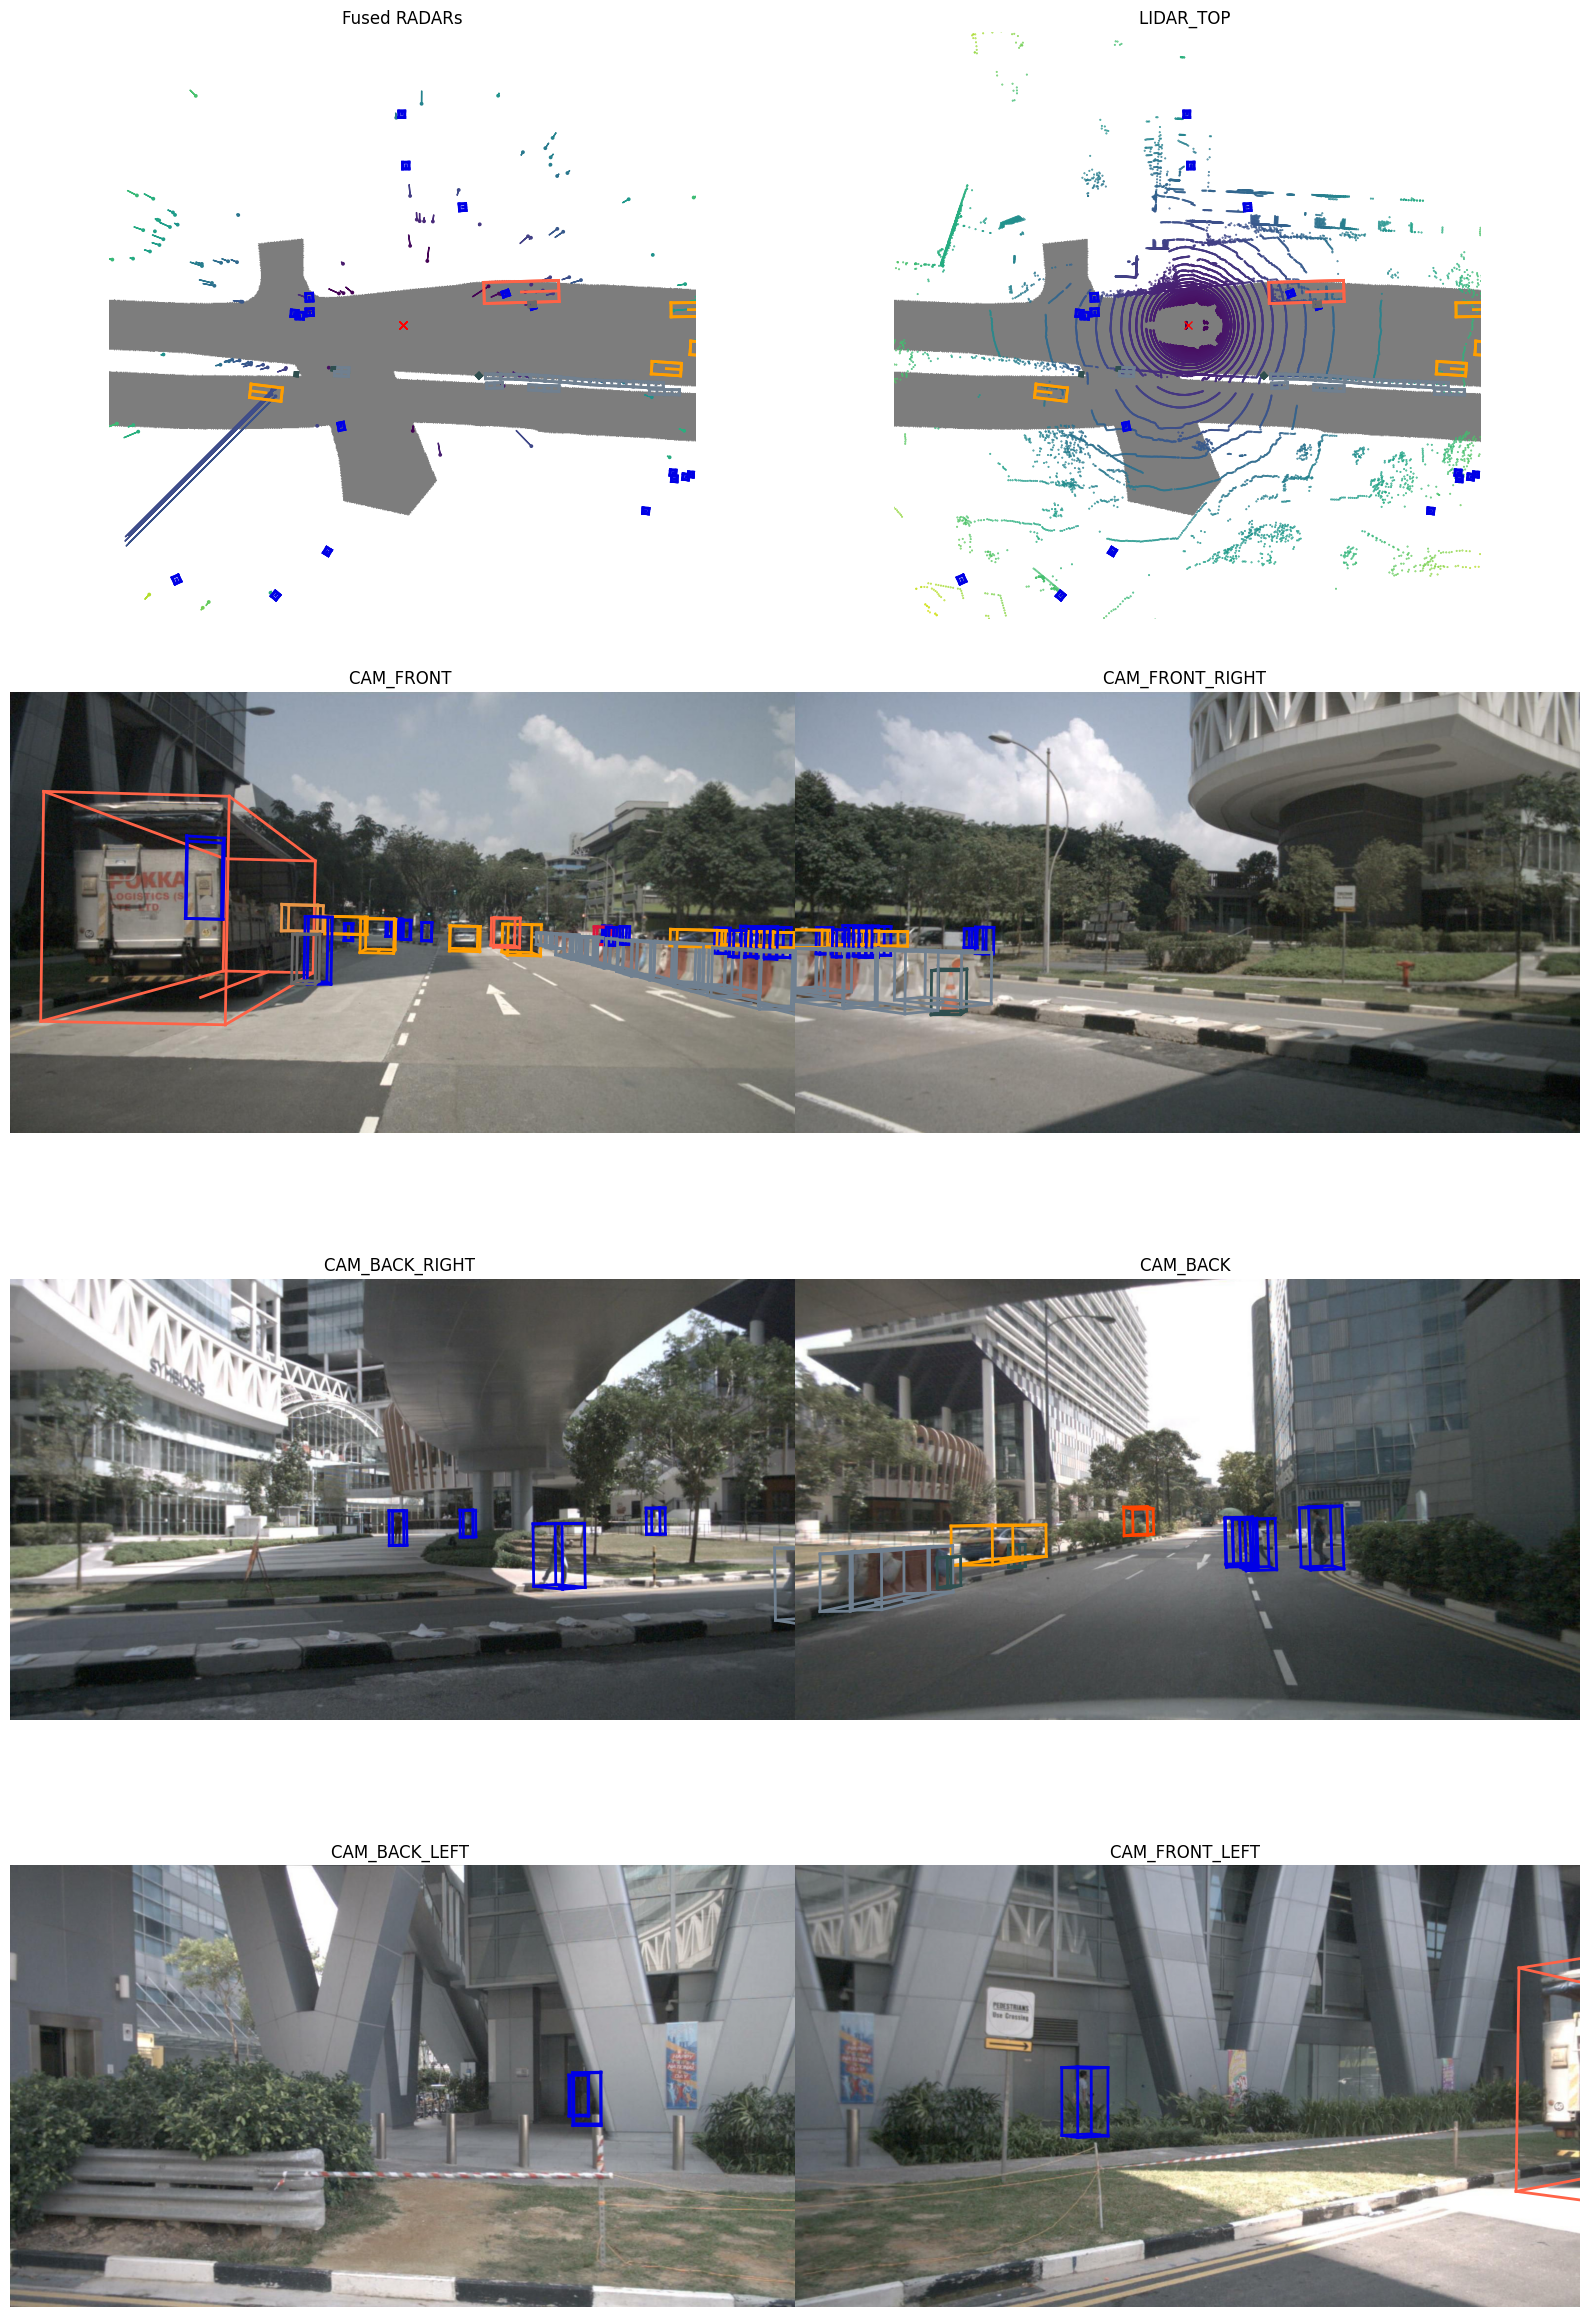

In [6]:
first_sample_token = my_scene['first_sample_token']
nusc.render_sample(first_sample_token)

O método **get** pode ser usado para coletar um registro específico da base de dados. O primeiro parâmetro dessa função é o nome da tabela que queremos acessar, que nesse caso é *sample*. O segundo parâmetro é um token especificando o registro que é desejado retornar.

No código abaixo, estamos coletando os dados do primeiro *sample* da primeira cena. OBS: Por se tratar do primeiro *sample*, o atributo "prev" é vazio.

In [7]:
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

### <a id="sample_data"></a> 4 - Sample data

Um registro da tabela `sample_data` é relacionado à um input de um dos sensores em um tempo específico. Este `sample_data` não precisa necessariamente possuir anotações (ser um **keyframe**). Todos os dados de um registro de `sample_data` são:

```plain
sample_data {
   "token":                   <str> -- Identificador único para o registro (igual um ID)
   "sample_token":            <str> -- Chave estrangeira para um sample. Caso o sample_data atual seja parte de um keyframe (is_key_frame = True), será apontado para o sample com timestamp igual ao timestamp atual. Caso contrário, irá apontar para o próximo sample com o timestamp mais próximo.
   "ego_pose_token":          <str> -- Chave estrangeira para informações de ego_pose
   "calibrated_sensor_token": <str> -- Chave estrangeira para informações de calibrated_sensor
   "filename":                <str> -- Caminho relativo para o input (por exemplo, uma imagem se for uma câmera)
   "fileformat":              <str> -- Formato do dado (extensão do arquivo)
   "width":                   <int> -- Se for uma imagem, é a largura da imagem em pixels.
   "height":                  <int> -- Se for uma imagem, é a altura da imagem em pixels.
   "timestamp":               <int> -- Unix timestamp (tempo em que o input foi coletado).
   "is_key_frame":            <bool> -- Será True se for parte de um keyframe (possui anotações), e False caso contrário
   "next":                    <str> -- Chave estrangeira apontando para o próximo sample_data do mesmo sensor. Será vazio se o sample_data atual for o último da cena
   "prev":                    <str> -- Chave estrangeira apontando para sample_data anterior do mesmo sensor. Será vazio se o sample_data atual for o primeiro da cena
   "sensor_modality"*:        <str> -- "camera", "lidar" ou "radar"
   "channel"*:                <str> -- chave única do sensor atual (e.g. "RADAR_FRONT", "CAM_FRONT", "LIDAR_TOP", etc.)
}
```

\* Propriedades marcadas com asterisco (`sensor_modality` e `channel`) não existem no *schema*. Estas propriedades são criadas pelo devkit, biblioteca que está sendo utilizada para interagir com os dados.

A seguir, é utilizado o método `get` novamente, só que dessa vez para coletar um registro da tabela `sample_data`. No código abaixo será coletado o registro do primeiro `sample_data` da câmera frontal da primeira cena. Por fazer parte de um *sample*, este *sample_data* será um **keyframe**, tendo sua propriedade `is_key_frame` como True.

In [8]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

A seguir, o método `render_sample_data` é utilizado para visualizar a imagem da câmera frontal. Por ser um **keyframe**, as anotações podem ser imprimidas juntamente.

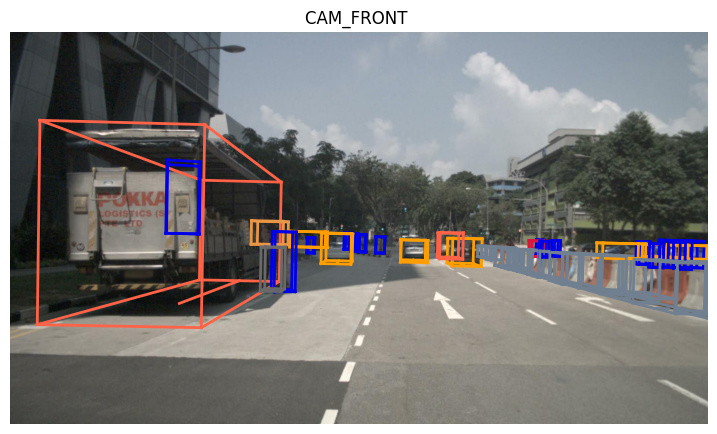

In [9]:
nusc.render_sample_data(cam_front_data['token'])

Agora, fazendo o mesmo para a próxima imagem do mesmo sensor, é possível perceber que ele não é um **keyframe**, ou seja, não possui anotações diretas.

In [12]:
next_cam_front_data = nusc.get('sample_data', cam_front_data['next'])
next_cam_front_data

{'token': '68e8e98cf7b0487baa139df808641db7',
 'sample_token': '39586f9d59004284a7114a68825e8eec',
 'ego_pose_token': '68e8e98cf7b0487baa139df808641db7',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927662460,
 'fileformat': 'jpg',
 'is_key_frame': False,
 'height': 900,
 'width': 1600,
 'filename': 'sweeps/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927662460.jpg',
 'prev': 'e3d495d4ac534d54b321f50006683844',
 'next': '512015c209c1490f906982c3b182c2a8',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

Também é possível visualizar essa próxima imagem. Nessa próxima imagem, ainda podemos ver as anotações, porém, estas são estimativas feitas a partir de uma interpolação linear entre a anotação anterior e a próxima (essa informação foi retirada do [próprio código da biblioteca](https://github.com/nutonomy/nuscenes-devkit/blob/master/python-sdk/nuscenes/nuscenes.py#L319-L375)).

In [15]:
nusc.render_sample_data(next_cam_front_data['token'])

Também é possível fazer acessar os dados de outros tipos de sensores, como LiDAR e RADAR. As próximas células de código acessam dados desses outros sensores.

In [18]:
sensor = 'RADAR_FRONT'
radar_front_data = nusc.get('sample_data', my_sample['data'][sensor])
radar_front_data

{'token': '37091c75b9704e0daa829ba56dfa0906',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '37091c75b9704e0daa829ba56dfa0906',
 'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'timestamp': 1532402927664178,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd',
 'prev': '',
 'next': 'f0b8593e08594a3eb1152c138b312813',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

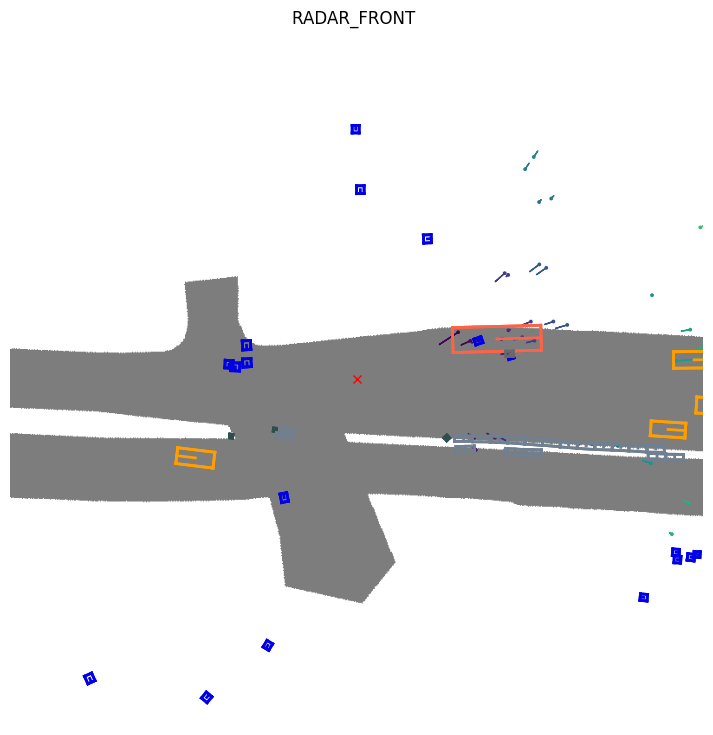

In [19]:
nusc.render_sample_data(radar_front_data['token'])

In [20]:
sensor = 'LIDAR_TOP'
lidar_top_data = nusc.get('sample_data', my_sample['data'][sensor])
lidar_top_data

{'token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402927647951,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin',
 'prev': '',
 'next': '0cedf1d2d652468d92d23491136b5d15',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

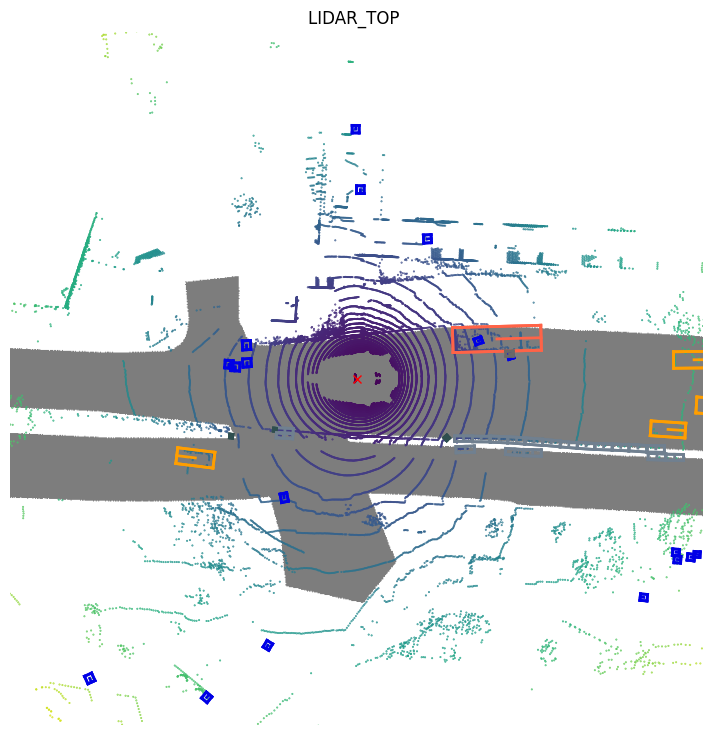

In [21]:
nusc.render_sample_data(lidar_top_data['token'])

### <a id="ego_pose"></a> 5 - Ego pose

Os registros de `ego_pose` são relacionados à localização e rotação do veículo em um determinado momento de retirada de input. Todo `sample_data` possui um token de `ego_pose`, que pode ser usado para coletar informações da situação do veículo no momento da coleta da informação. As propriedades desta tabela são as seguintes:

```plain
ego_pose {
   "token":                   <str> -- Identificador único de um ego_pose (igual um ID)
   "translation":             <float> [3] -- Posição do veículo em metros
   "rotation":                <float> [4] -- Rotação do veículo
   "timestamp":               <int> -- Unix timestamp (momento em que essa informação foi coletada)
}
```

OBS: é dito que no *paper* sobre a nuScenes é disponibilizado mais informações de como foram coletados esses registros, possivelmente explicando melhor como utilizá-los

O código abaixo coleta as informações do veículo da primeira imagem da câmera frontal da primeira cena. Para isso, é usado o método `get`.

In [22]:
nusc.get('ego_pose', cam_front_data['ego_pose_token'])

{'token': 'e3d495d4ac534d54b321f50006683844',
 'timestamp': 1532402927612460,
 'rotation': [0.5720063498929273,
  -0.0021434844534272707,
  0.011564094980151613,
  -0.8201648693182716],
 'translation': [411.4199861830012, 1181.197175631848, 0.0]}